# Alignment of 2D NMR data using WNetAlign

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nmr.load_spectra import load_spectrum, load_spectra
from nmr.align import align_pair, save_alignment
from nmr.postprocess import postprocess_simulated_pair
from nmr.simulate import simulate_2d_shifts
from nmr.postprocess import postprocess_simulated_chain_results, postprocess_chain_results
from nmr.metrics import metrics_simulated_CM
from nmr.nmr_plots import plot_temperatures

In [3]:
FIG_PATH = "Figures"

In [4]:
DATA_PATH = "2D/15N_HSQC_GB1_reduced"

In [5]:
max_peak_fraction = 0.1

## Simulate the synthetic temperature series

In [6]:
h_lim = (0.015, 0.035)
n_lim = (-0.01, 0.015)
h_t_lim = (0, 0.01)
n_t_lim = (0, 0.005)

OUT_FOLDER = "2D/15N_HSQC_GB1_simulated/max_peak_fraction"
OUT_FOLDER = f"{OUT_FOLDER}/H_{h_lim}_{h_t_lim}_N_{n_lim}_{n_t_lim}"

simulated_spectra, _, _ = simulate_2d_shifts(data_path=DATA_PATH,
                                             k=54,
                                             scale_nucl={"15N": 10},
                                             nuclei = ["15N", "1H"],
                                             max_peak_fraction=max_peak_fraction,
                                             h_lim = h_lim,
                                             n_lim = n_lim,
                                             h_t_lim = h_t_lim,
                                             n_t_lim = n_t_lim,
                                             OUT_FOLDER = OUT_FOLDER,
                                             seed = 0,
                                             default_rng = False,
                                            )

[np.float64(81.4995277), np.float64(67.1326053), np.float64(59.5811505), np.float64(50.0541492), np.float64(30.085471499999997), np.float64(26.76988544)]
[0.0262858 0.0418359 0.0205998 ... 0.0406096 0.0196429 0.0237377]
original_intensities
 [0.0246435 0.0456111 0.0703528 ... 0.0225599 0.0381934 0.0224108]


[np.float64(81.4995277), np.float64(67.1326053), np.float64(59.5811505), np.float64(50.0541492), np.float64(30.085471499999997), np.float64(26.76988544)]
[0.0262858 0.0418359 0.0205998 ... 0.0406096 0.0196429 0.0237377]
original_intensities
 [0.0246435 0.0456111 0.0703528 ... 0.0225599 0.0381934 0.0224108]


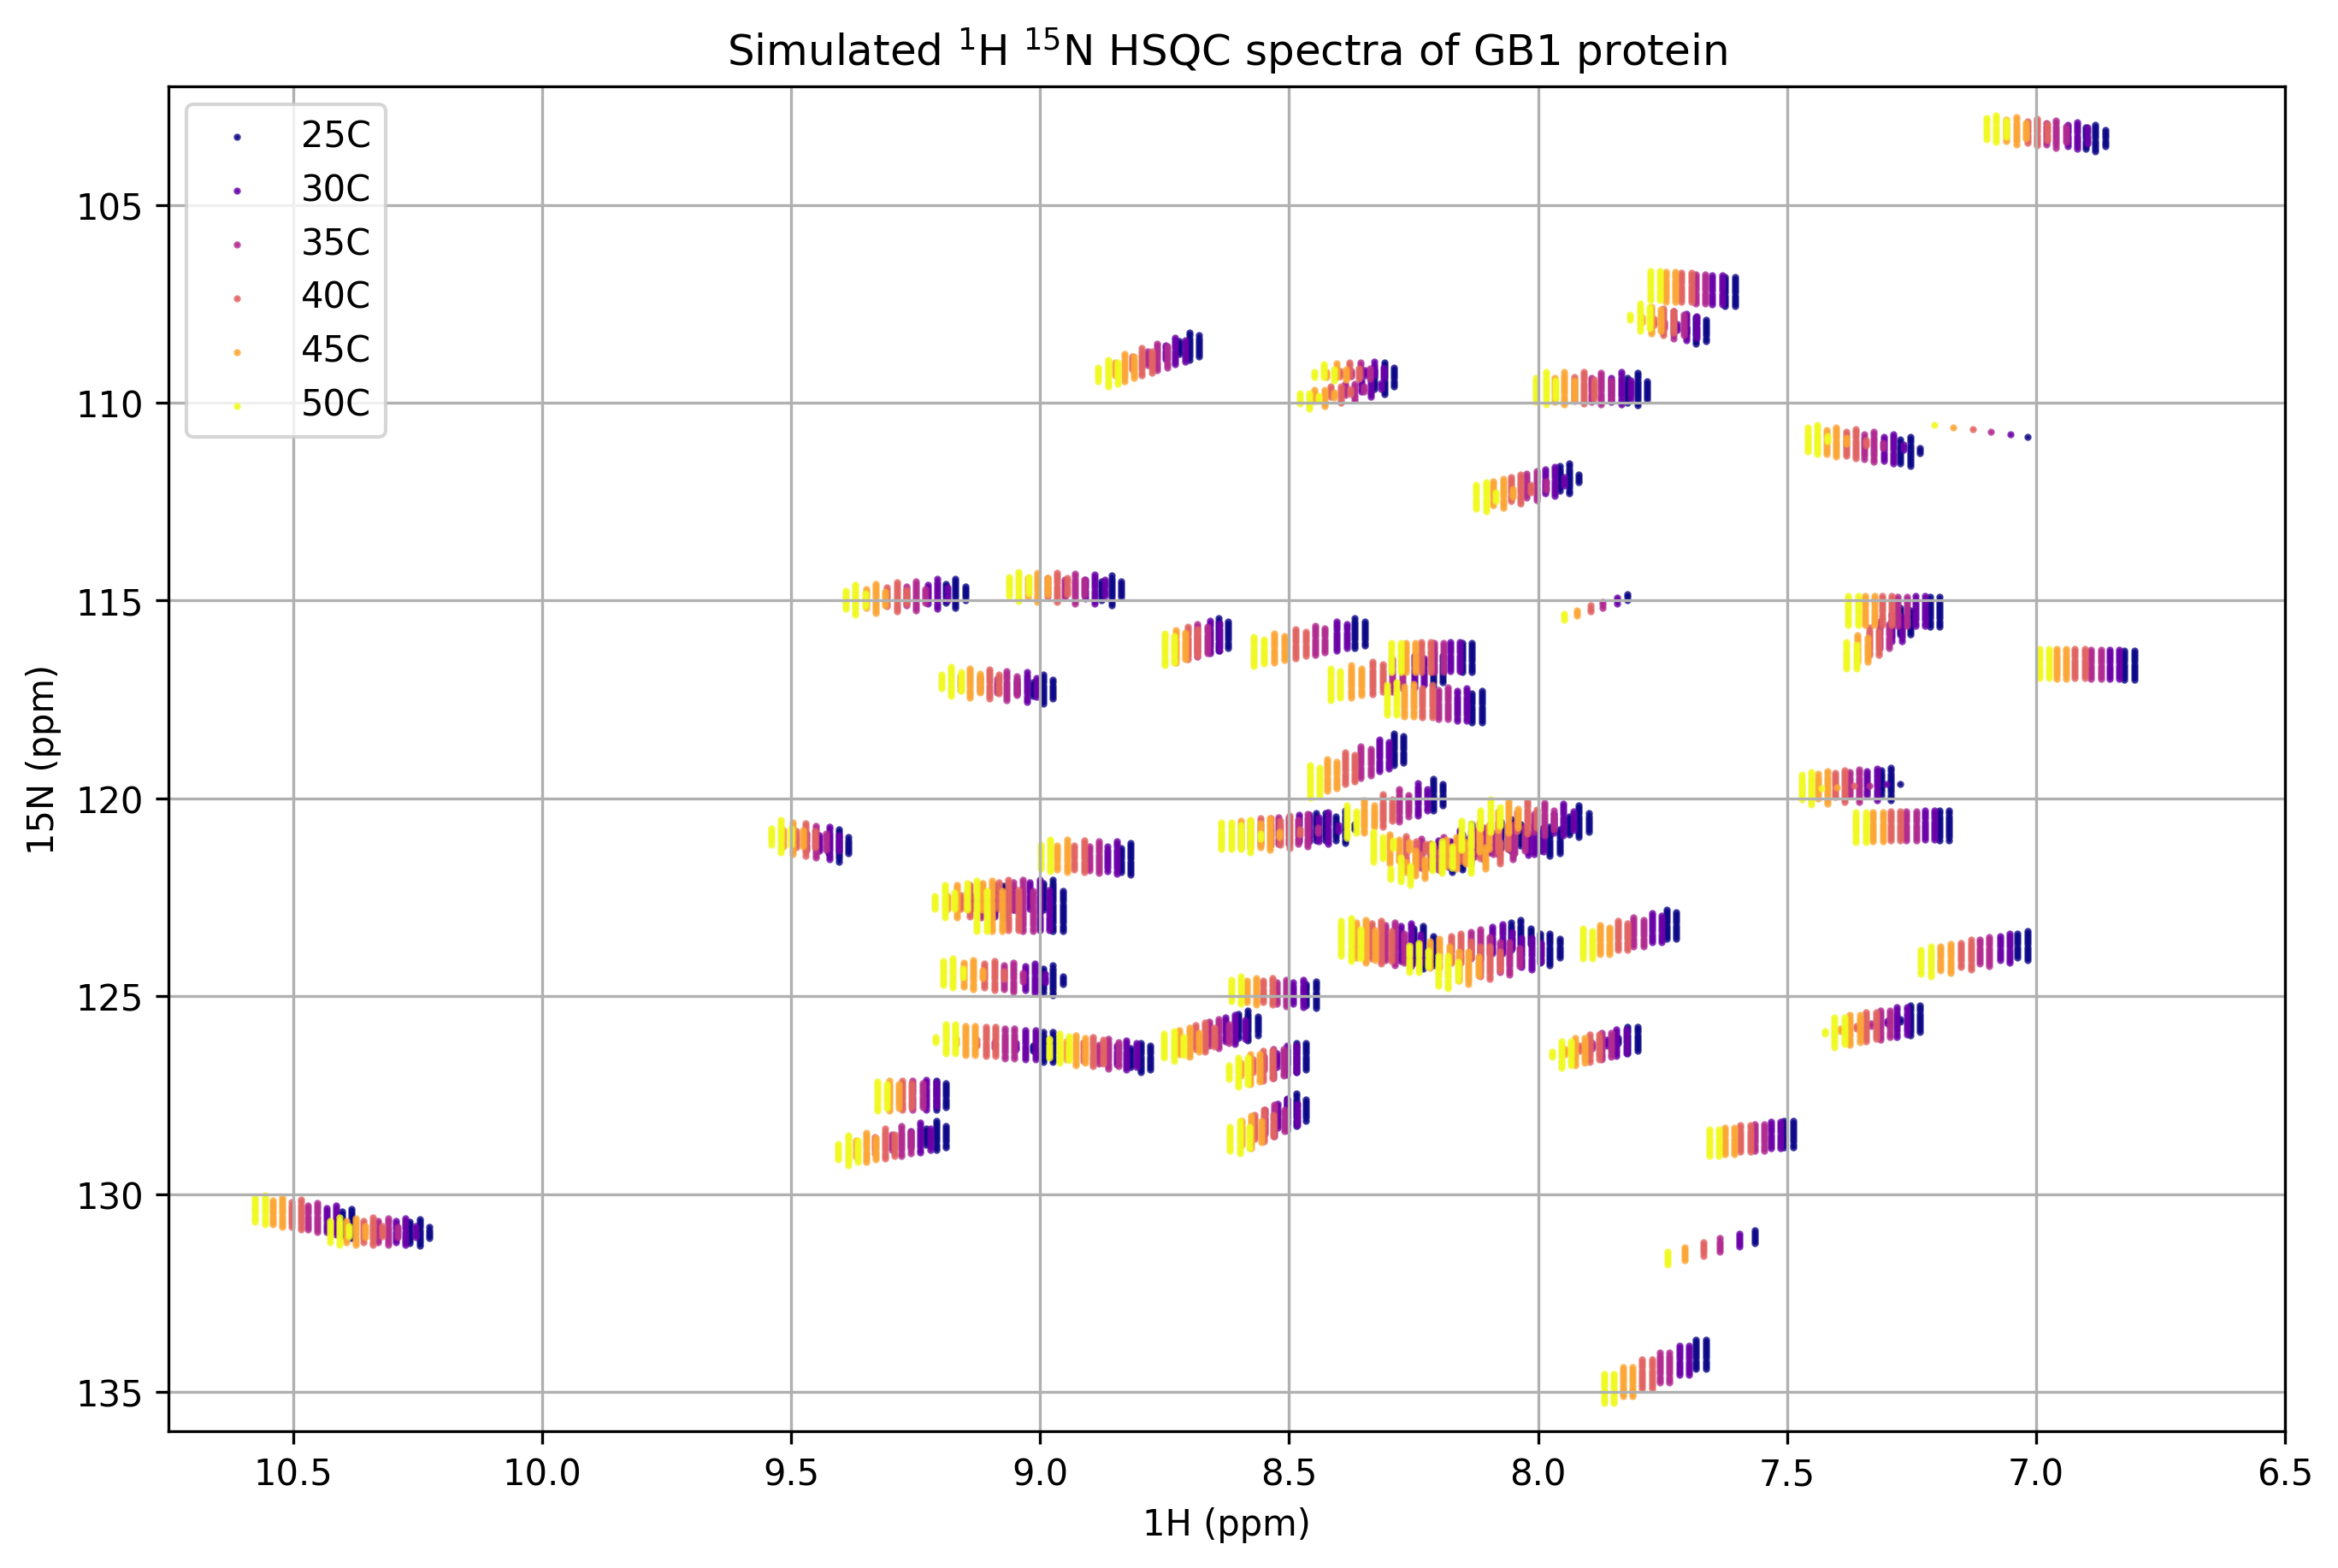

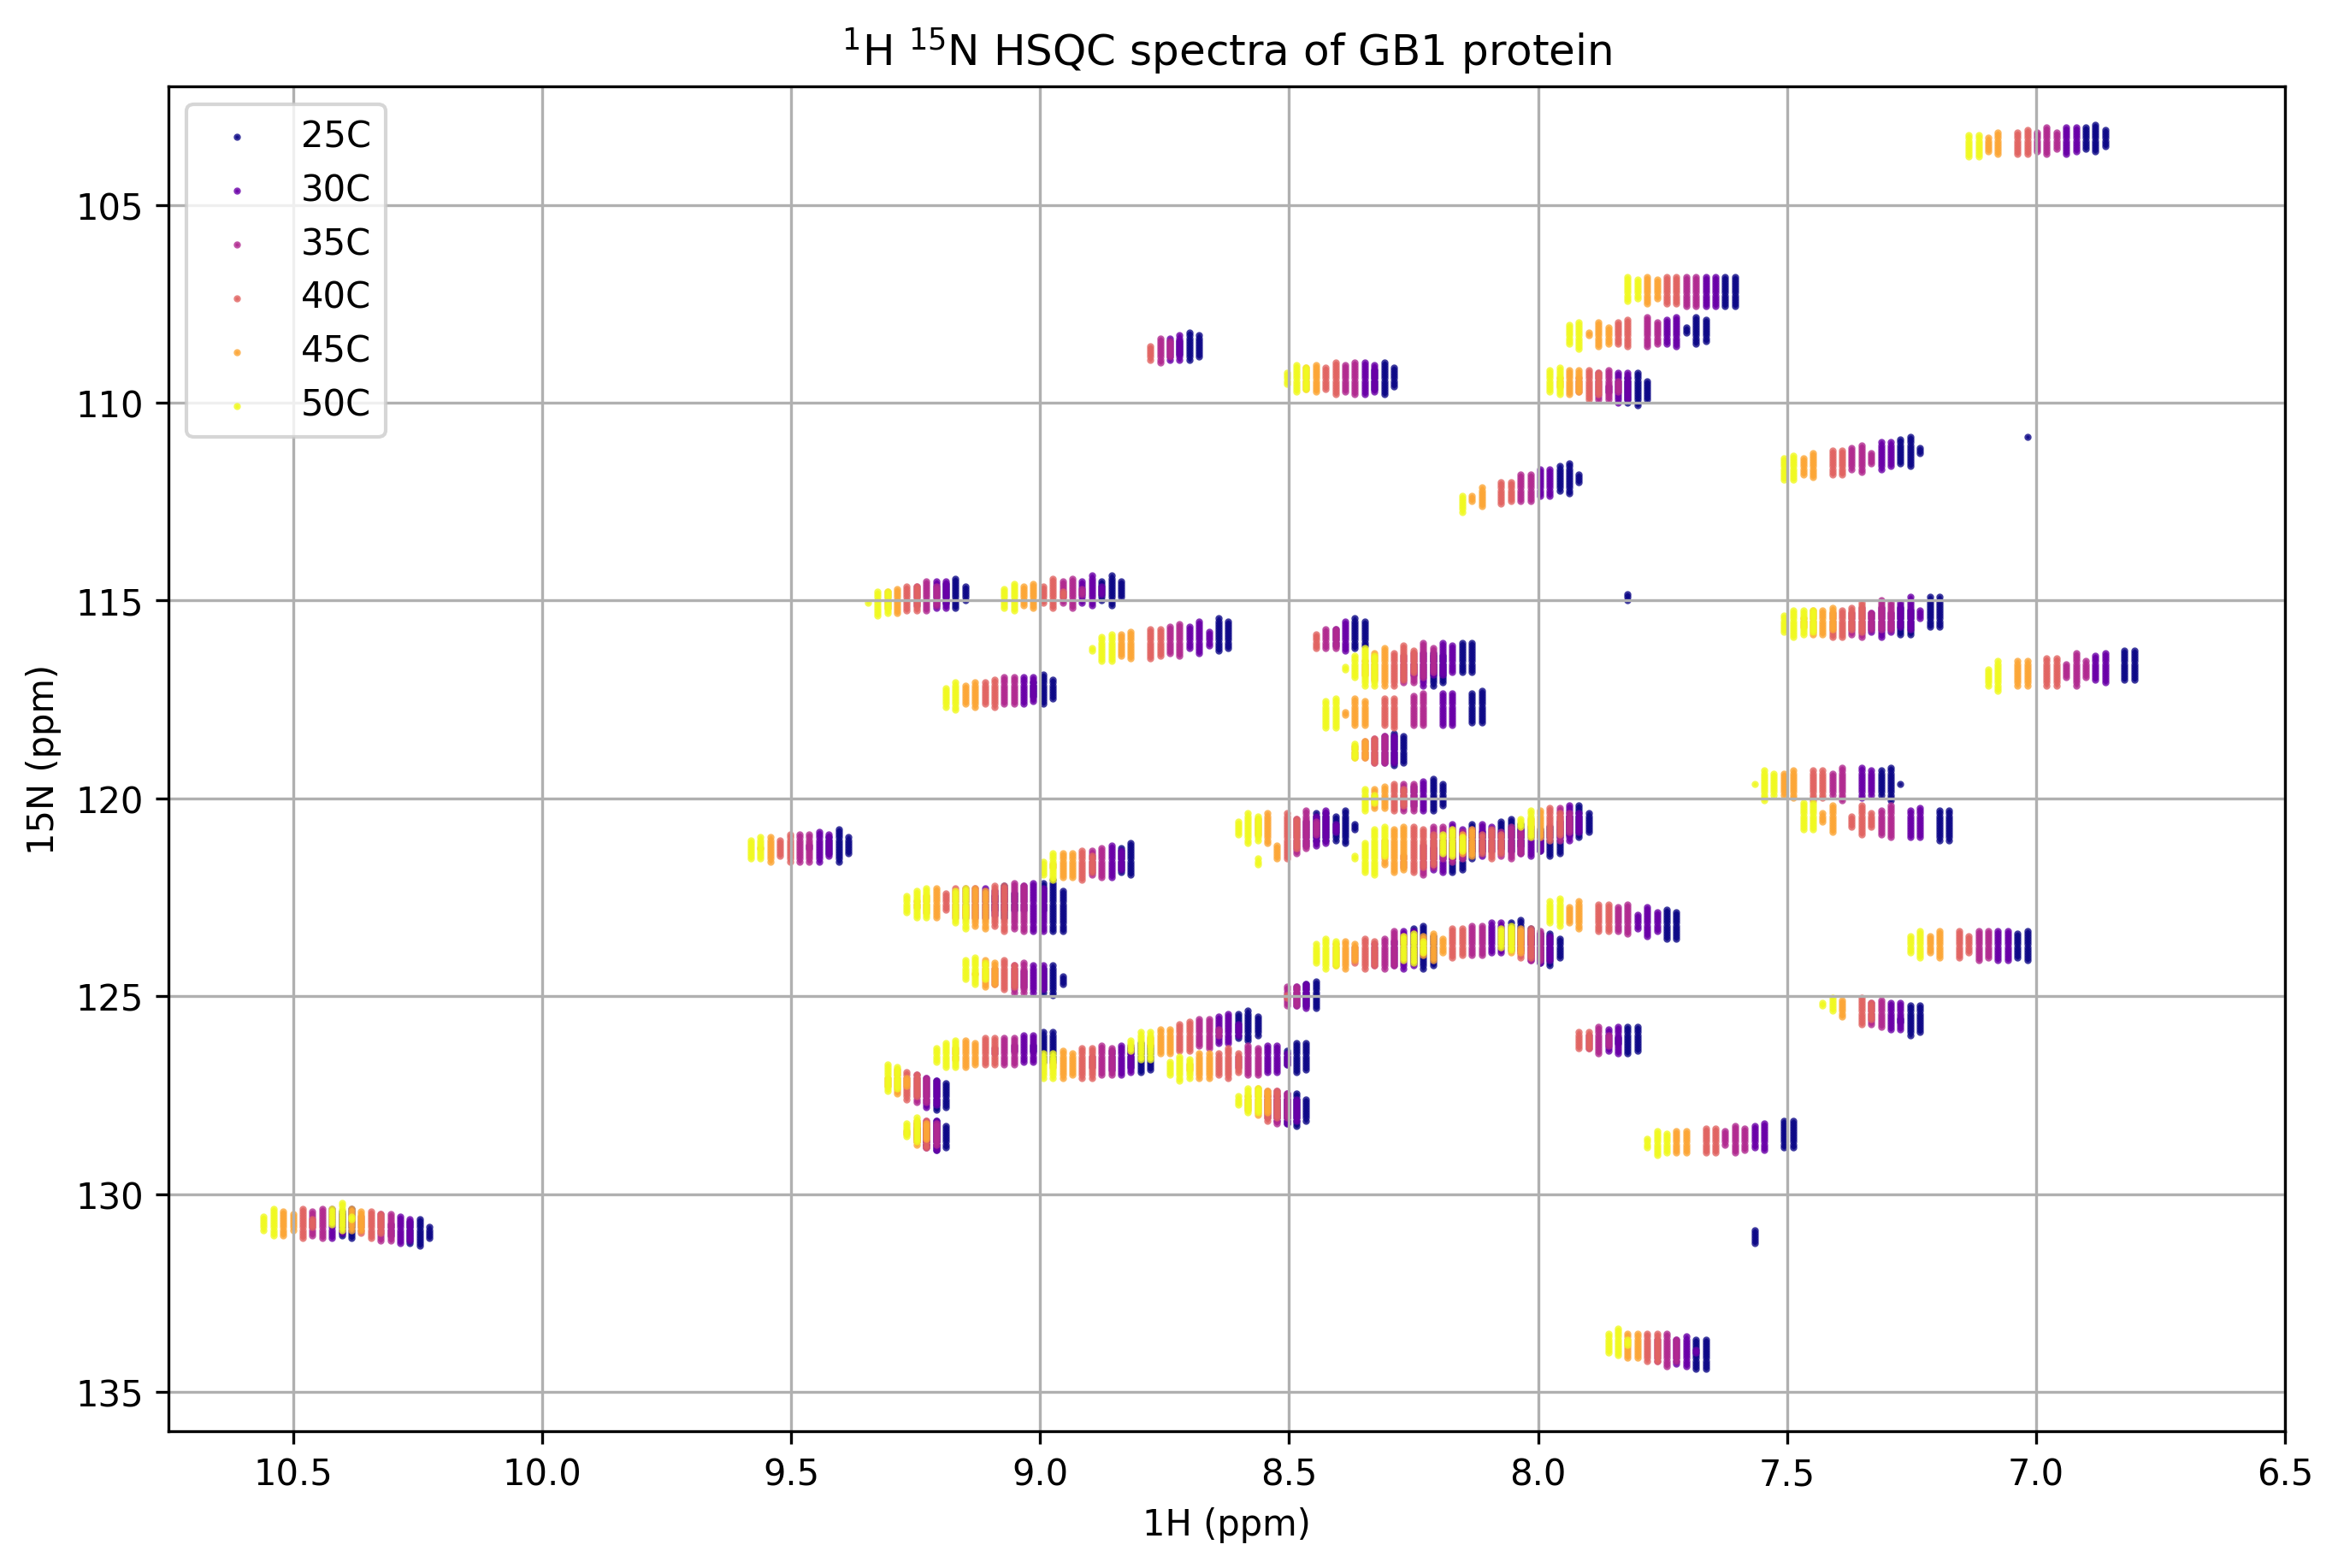

In [7]:
h_lim = (0.015, 0.035)
n_lim = (-0.01, 0.015)
h_t_lim = (0, 0.01)
n_t_lim = (0, 0.005)

OUT_FOLDER = "2D/15N_HSQC_GB1_simulated/max_peak_fraction"
OUT_FOLDER = f"{OUT_FOLDER}/H_{h_lim}_{h_t_lim}_N_{n_lim}_{n_t_lim}"

simulated_spectra, _, _ = simulate_2d_shifts(data_path=DATA_PATH,
                                             k=54,
                                             scale_nucl={"15N": 10},
                                             nuclei = ["15N", "1H"],
                                             max_peak_fraction=max_peak_fraction,
                                             h_lim = h_lim,
                                             n_lim = n_lim,
                                             h_t_lim = h_t_lim,
                                             n_t_lim = n_t_lim,
                                             OUT_FOLDER = OUT_FOLDER,
                                             seed = 0,
                                             default_rng = False,
                                            )

plot_temperatures(data_path=OUT_FOLDER, 
                  max_peak_fraction=None, 
                  intensity_threshold=0,
                  cmap_name="plasma", 
                  figsize=(9,6), 
                  dpi=300,
                  alpha=0.8,
                  s=1,
                  hlim = (6.5, 10.75), # (6, 11)
                  nlim = (102, 136), # (100, 136)
                 )
plt.title('Simulated $^1$H $^{15}$N HSQC spectra of GB1 protein')
OUT_PATH = f"{FIG_PATH}/GB1_simulated_mpf_{max_peak_fraction}.png"
plt.savefig(OUT_PATH)
plt.show()

plot_temperatures(data_path=DATA_PATH, 
                  max_peak_fraction=max_peak_fraction, 
                  intensity_threshold=None,
                  cmap_name="plasma", 
                  figsize=(9,6), 
                  dpi=300,
                  alpha=0.8,
                  s=1,
                  hlim = (6.5, 10.75), # (6, 11)
                  nlim = (102, 136), # (100, 136)
                 )
OUT_PATH = f"{FIG_PATH}/GB1_mpf_{max_peak_fraction}.png"
plt.savefig(OUT_PATH)
plt.show()